# Imports & Configuration

In [ ]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Configuration
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Loading CSV

In [ ]:
# Import Datasets

path_stress_v1 = "/content/drive/MyDrive/LAB/3rdsemestar/MLST/RedziSens_StressLevelManagement/Dataset/PhysioNet/Stress_Level_v1.csv"
path_stress_v2 = "/content/drive/MyDrive/LAB/3rdsemestar/MLST/RedziSens_StressLevelManagement/Dataset/PhysioNet/Stress_Level_v2.csv"
path_hrv_labels = "/content/drive/MyDrive/LAB/3rdsemestar/MLST/RedziSens_StressLevelManagement/Dataset/SWELL/data/final/test.csv"

df_stress_v1 = pd.read_csv(path_stress_v1)
print(f"-> Successfully loaded Stress_Level_v1: {df_stress_v1.shape[0]} rows, {df_stress_v1.shape[1]} columns")

df_stress_v2 = pd.read_csv(path_stress_v2)
print(f"-> Successfully loaded Stress_Level_v2: {df_stress_v2.shape[0]} rows, {df_stress_v2.shape[1]} columns")

df_swell = pd.read_csv(path_hrv_labels)
print(f"-> Successfully loaded hrv stress labels: {df_swell.shape[0]} rows, {df_swell.shape[1]} columns")


-> Successfully loaded Stress_Level_v1: 18 rows, 9 columns
-> Successfully loaded Stress_Level_v2: 18 rows, 8 columns
-> Successfully loaded hrv stress labels: 41033 rows, 36 columns


# SWELL Dataset

In [ ]:
# SWELL Dataset

print("=" * 80)
print("DATASET 1: SWELL (Heart Rate Variability)")
print("=" * 80)

dataset = df_swell
print(f"\n-> SHAPE: {dataset.shape[0]:,} rows × {dataset.shape[1]} columns")

# Show all columns
print(f"\n-> COLUMNS:")
for i, col in enumerate(dataset.columns, 1):
    print(f"   {i}. {col}")

# Show first 10 actual rows
print(f"\n-> FIRST 10 ROWS:")
print(dataset.head(10))

# Show basic info
print(f"\nINFO:")
print(f"-> Missing values: {dataset.isnull().sum().sum()}")
print(f"-> Duplicates: {dataset.duplicated().sum()}")
print(f"-> Data types:")
print(dataset.dtypes)


DATASET 1: SWELL (Heart Rate Variability)

-> SHAPE: 41,033 rows × 36 columns

-> COLUMNS:
   1. MEAN_RR
   2. MEDIAN_RR
   3. SDRR
   4. RMSSD
   5. SDSD
   6. SDRR_RMSSD
   7. HR
   8. pNN25
   9. pNN50
   10. SD1
   11. SD2
   12. KURT
   13. SKEW
   14. MEAN_REL_RR
   15. MEDIAN_REL_RR
   16. SDRR_REL_RR
   17. RMSSD_REL_RR
   18. SDSD_REL_RR
   19. SDRR_RMSSD_REL_RR
   20. KURT_REL_RR
   21. SKEW_REL_RR
   22. VLF
   23. VLF_PCT
   24. LF
   25. LF_PCT
   26. LF_NU
   27. HF
   28. HF_PCT
   29. HF_NU
   30. TP
   31. LF_HF
   32. HF_LF
   33. sampen
   34. higuci
   35. datasetId
   36. condition

-> FIRST 10 ROWS:
      MEAN_RR   MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0  721.901897  727.267280   74.722315  12.361264  12.361069    6.044877   
1  843.538633  844.407930   58.499429  19.298880  19.298795    3.031234   
2  958.523868  966.671125  132.849110  21.342715  21.342653    6.224565   
3  824.838669  842.485905  117.822094  11.771814  11.771248   10.008830

VISUALIZATION: SWELL - Traning data


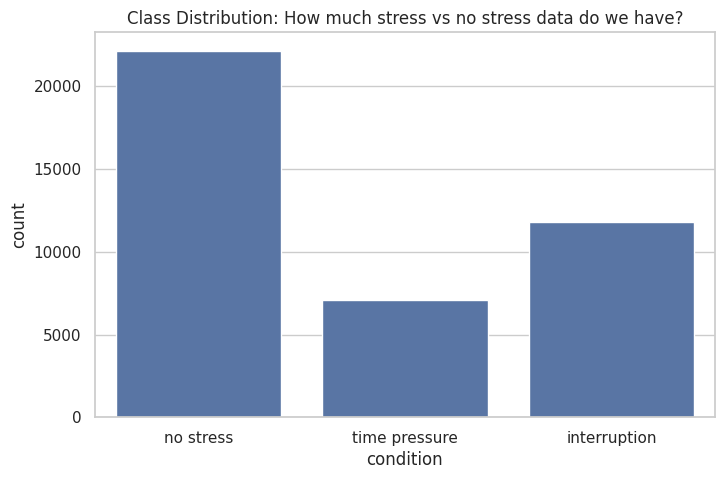

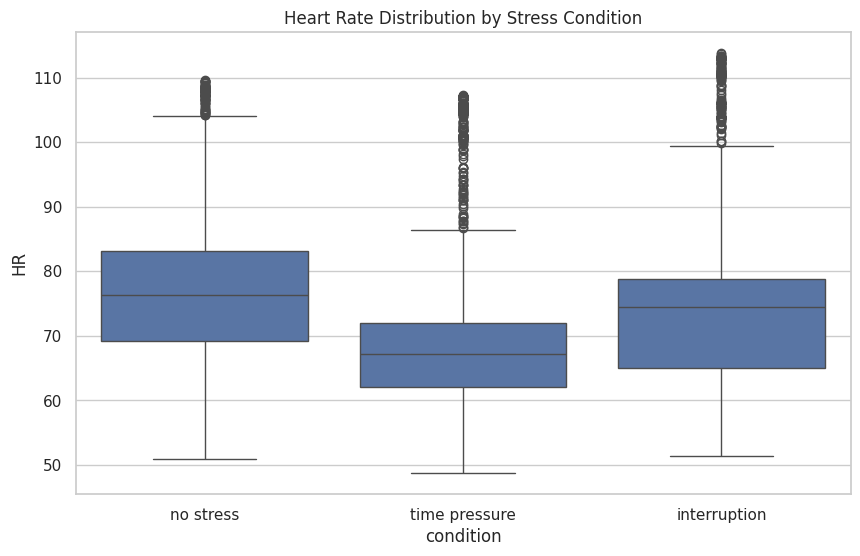

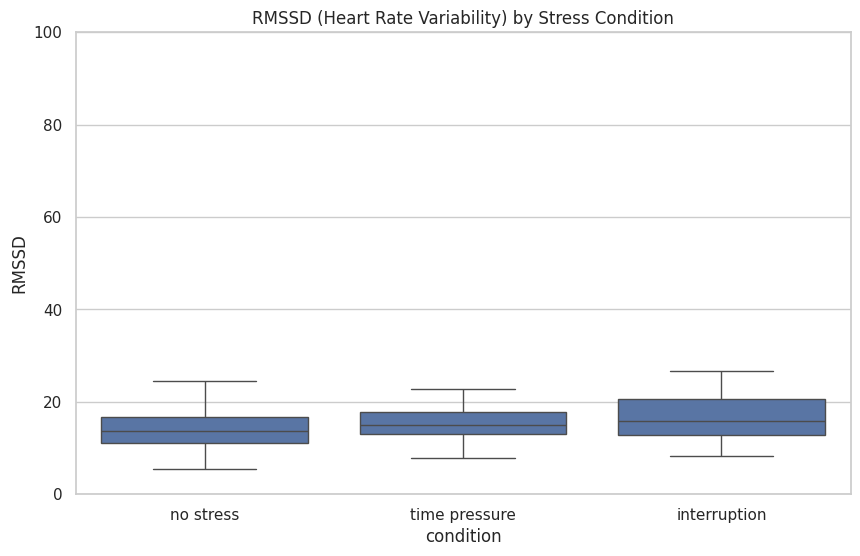

In [ ]:
# Visualizing SWELL Data

# Set plot style
sns.set(style="whitegrid")

print("=" * 80)
print("VISUALIZATION: SWELL - Traning data")
print("=" * 80)

# Plot Count of Conditions
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df_swell)
plt.title('Class Distribution: How much stress vs no stress data do we have?')
plt.show()
print("=" * 80)
# Boxplot: Heart Rate vs Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='HR', data=df_swell)
plt.title('Heart Rate Distribution by Stress Condition')
plt.show()
print("=" * 80)
# 3. Boxplot: RMSSD vs Condition
# RMSSD is the "Gold Standard" for HRV stress. Lower usually means MORE stress.
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='RMSSD', data=df_swell)
plt.title('RMSSD (Heart Rate Variability) by Stress Condition')
plt.ylim(0, 100) # Zoom in to see the boxes clearly
plt.show()

# PhysioNet Datasets

## Dataset: Stress Level v1

In [ ]:
# Stress_Level_v1 - Exploration

print("=" * 80)
print("DATASET 2: Stress_Level_v1")
print("=" * 80)

dataset = df_stress_v1
print(f"\n-> SHAPE: {dataset.shape[0]} rows × {dataset.shape[1]} columns")
print(f"   (Subjects: {dataset.shape[0]}, Measurements: {dataset.shape[1]})")

print(f"\n-> COLUMNS (Experimental Phases):")
for i, col in enumerate(dataset.columns, 1):
    print(f"   {i}. {col}")

print(f"\n-> ALL DATA:")
print(dataset)

print(f"\n-> STATISTICS:")
print(dataset.describe())

print(f"\n-> MISSING VALUES: {dataset.isnull().sum().sum()}")
print(f"-> DUPLICATES: {dataset.duplicated().sum()}")


DATASET 2: Stress_Level_v1

-> SHAPE: 18 rows × 9 columns
   (Subjects: 18, Measurements: 9)

-> COLUMNS (Experimental Phases):
   1. Unnamed: 0
   2. Baseline
   3. Stroop
   4. First Rest
   5. TMCT
   6. Second Rest
   7. Real Opinion
   8. Opposite Opinion
   9. Subtract

-> ALL DATA:
   Unnamed: 0  Baseline  Stroop  First Rest  TMCT  Second Rest  Real Opinion  \
0         S01       3.0     4.5         4.0   4.0          5.5           6.0   
1         S02       2.0     4.0         2.0   2.0          2.0           4.0   
2         S03       3.0     3.0         3.0   4.0          3.0           3.0   
3         S04       3.0     3.0         2.0   3.0          1.0           1.0   
4         S05       1.0     2.0         1.0   4.0          1.0           2.0   
5         S06       2.0     3.0         2.0   5.0          3.0           3.0   
6         S07       5.0     6.0         6.0   8.0          7.0           8.0   
7         S08       0.0     1.0         1.0   5.5          1.5        

 **INTERPRETATION**

   Each column represents stress levels DURING different experimental phases:
   - Baseline: Normal resting state
   - Stroop: During challenging Stroop test
   - First Rest: After Stroop, recovery phase
   - TMCT: Time Measuring Cognitive Task
   - Second Rest: Final recovery phase
   - Real Opinion, Opposite Opinion: Social stress tasks
   - Subtract: Arithmetic cognitive task

VISUALIZATION: Stress_Level_v1


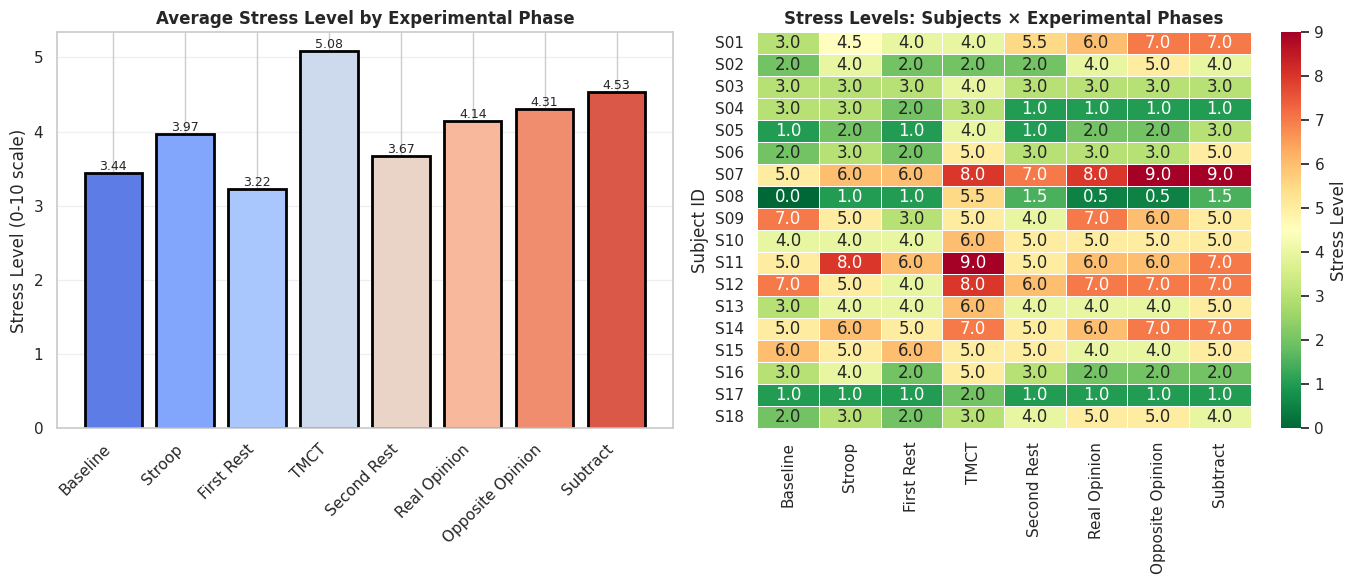

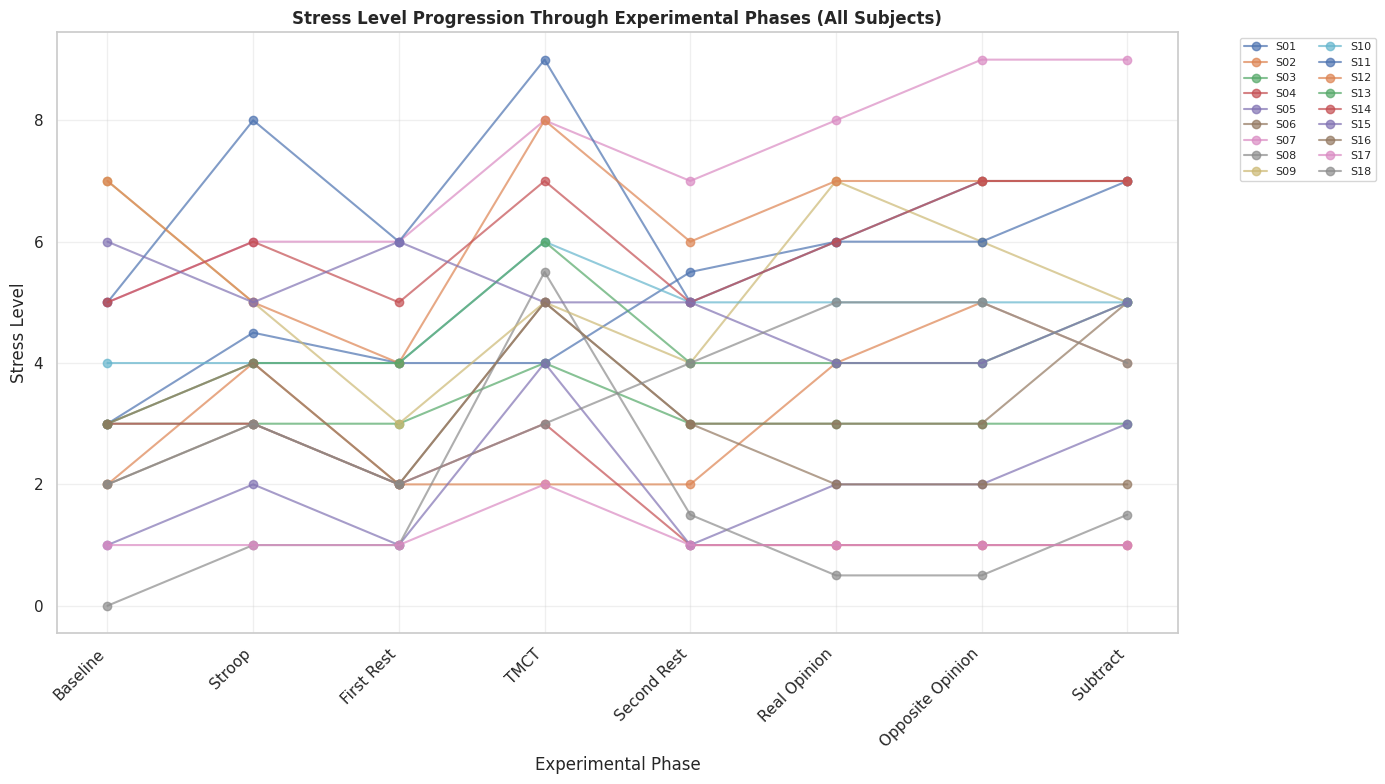

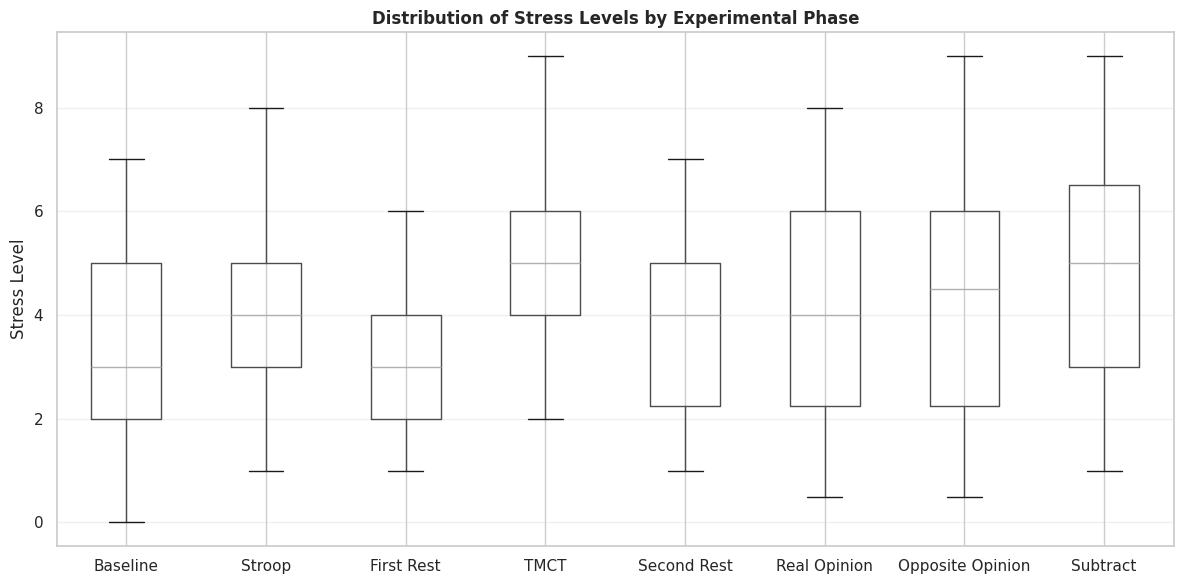

In [ ]:
# Stress_Level_v1 - Visualization

print("=" * 80)
print("VISUALIZATION: Stress_Level_v1")
print("=" * 80)

# Prepare data for plotting: exclude the non-numeric 'Unnamed: 0' column
df_stress_v1_numeric_cols = df_stress_v1.drop(columns=['Unnamed: 0'])
df_stress_v1_indexed = df_stress_v1.set_index('Unnamed: 0')

# Plot 1: Average stress by phase
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
mean_stress = df_stress_v1_numeric_cols.mean() # Calculate mean on numeric columns only
colors = sns.color_palette("coolwarm", len(mean_stress))
bars = plt.bar(range(len(mean_stress)), mean_stress.values, color=colors, edgecolor='black', linewidth=2)
plt.xticks(range(len(mean_stress)), mean_stress.index, rotation=45, ha='right')
plt.title('Average Stress Level by Experimental Phase', fontsize=12, fontweight='bold')
plt.ylabel('Stress Level (0-10 scale)')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Heatmap of all subjects × phases
plt.subplot(1, 2, 2)
sns.heatmap(df_stress_v1_indexed, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Stress Level'}, linewidths=0.5) # Use indexed DF for heatmap
plt.title('Stress Levels: Subjects × Experimental Phases', fontsize=12, fontweight='bold')
plt.ylabel('Subject ID')

plt.tight_layout()
plt.show()

print("=" * 80)

# Plot 3: Line plot showing stress progression through experiment
plt.figure(figsize=(14, 8))

for subject_id in df_stress_v1_indexed.index: # Iterate through indexed DataFrame
    plt.plot(df_stress_v1_indexed.columns, df_stress_v1_indexed.loc[subject_id], marker='o', label=subject_id, alpha=0.7)

plt.title('Stress Level Progression Through Experimental Phases (All Subjects)', fontsize=12, fontweight='bold')
plt.xlabel('Experimental Phase')
plt.ylabel('Stress Level')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 80)

# Plot 4: Boxplot showing distribution by phase
plt.figure(figsize=(12, 6))
df_stress_v1_numeric_cols.boxplot() # Use numeric-only DF for boxplot
plt.title('Distribution of Stress Levels by Experimental Phase', fontsize=12, fontweight='bold')
plt.ylabel('Stress Level')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("=" * 80)

## Dataset: Stress Level v2

In [ ]:
# Stress_Level_v2 - Exploration

print("=" * 80)
print("DATASET 5: Stress_Level_v2")
print("=" * 80)

dataset = df_stress_v2
print(f"\n-> SHAPE: {dataset.shape[0]} rows × {dataset.shape[1]} columns")
print(f"   (Subjects: {dataset.shape[0]}, Measurements: {dataset.shape[1]})")

print(f"\n-> COLUMNS (Experimental Phases):")
for i, col in enumerate(dataset.columns, 1):
    print(f"   {i}. {col}")

print(f"\n-> ALL DATA:")
print(dataset)

print(f"\n-> STATISTICS:")
print(dataset.describe())

print(f"\n-> MISSING VALUES: {dataset.isnull().sum().sum()}")
print(f"-> DUPLICATES: {dataset.duplicated().sum()}")


DATASET 5: Stress_Level_v2

-> SHAPE: 18 rows × 8 columns
   (Subjects: 18, Measurements: 8)

-> COLUMNS (Experimental Phases):
   1. Unnamed: 0
   2. Baseline
   3. TMCT
   4. First Rest
   5. Real Opinion
   6. Opposite Opinion
   7. Second Rest
   8. Subtract

-> ALL DATA:
   Unnamed: 0  Baseline  TMCT  First Rest  Real Opinion  Opposite Opinion  \
0         f01       2.0   5.0         2.0           3.0               4.0   
1         f02       3.0   5.0         1.0           2.0               3.0   
2         f03       5.0   8.0         1.0           3.0               5.0   
3         f04       2.0   4.0         3.0           3.0               4.0   
4         f05       3.0   4.0         3.0           3.0               3.0   
5         f06       3.0   4.0         1.0           2.0               3.0   
6         f07       1.0   4.0         1.0           3.0               1.0   
7         f08       0.0   3.0         1.0           1.0               1.0   
8         f09       5.0   6.0 

 **INTERPRETATION**

Similar to v1, but WITHOUT the Stroop and Second Rest phases.

This is a simplified version with 7 instead of 8 measurements.

VISUALIZATION: Stress_Level_v2


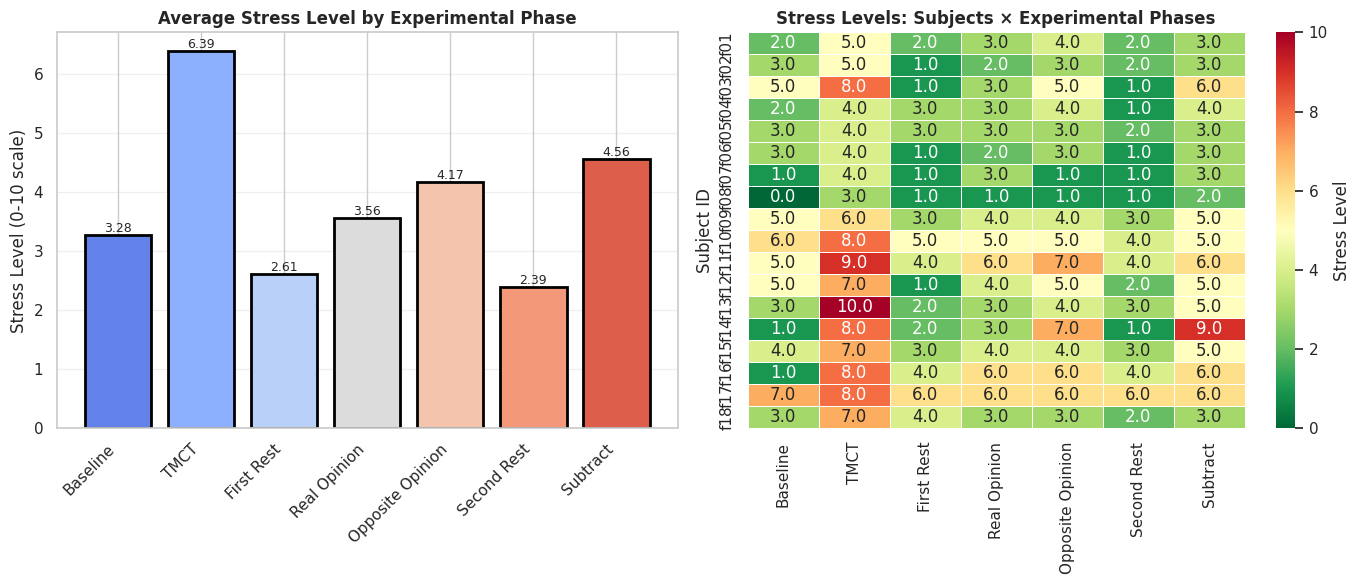

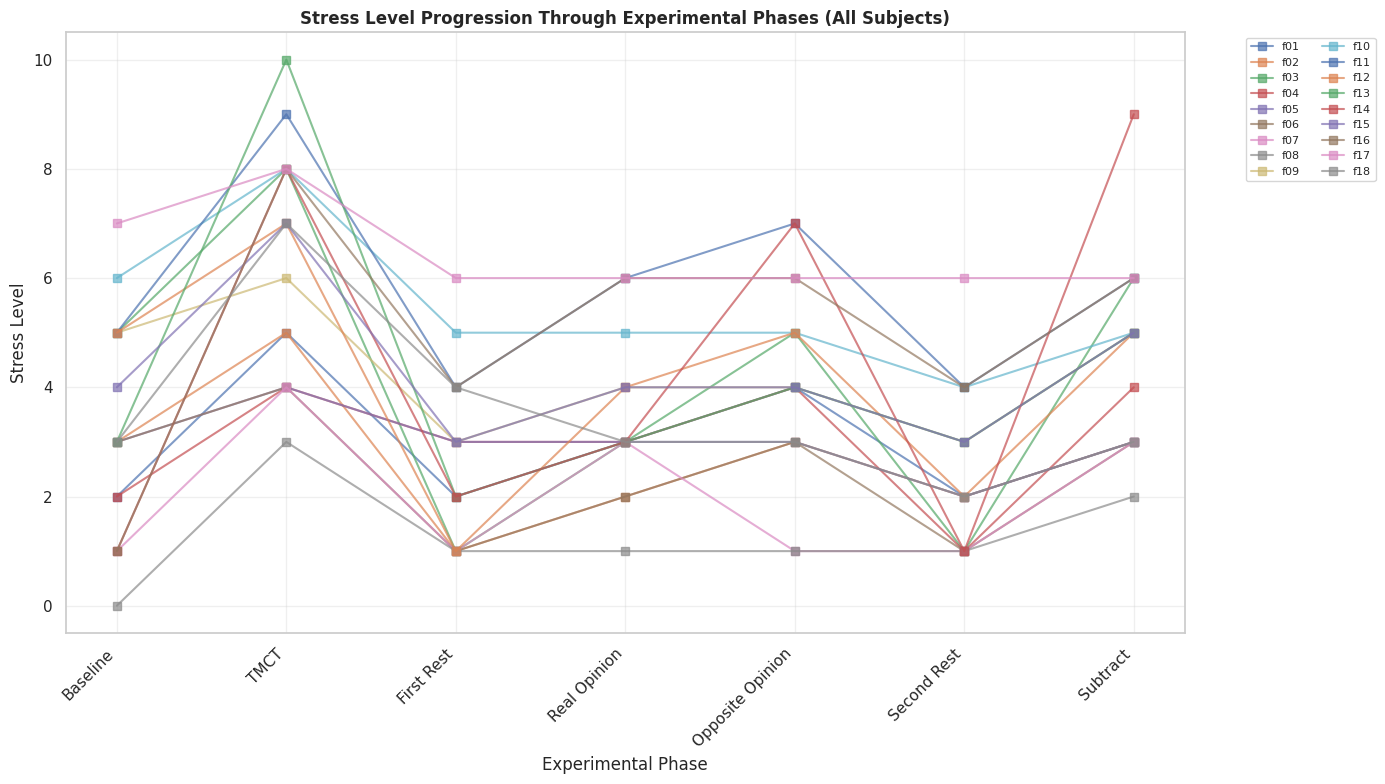

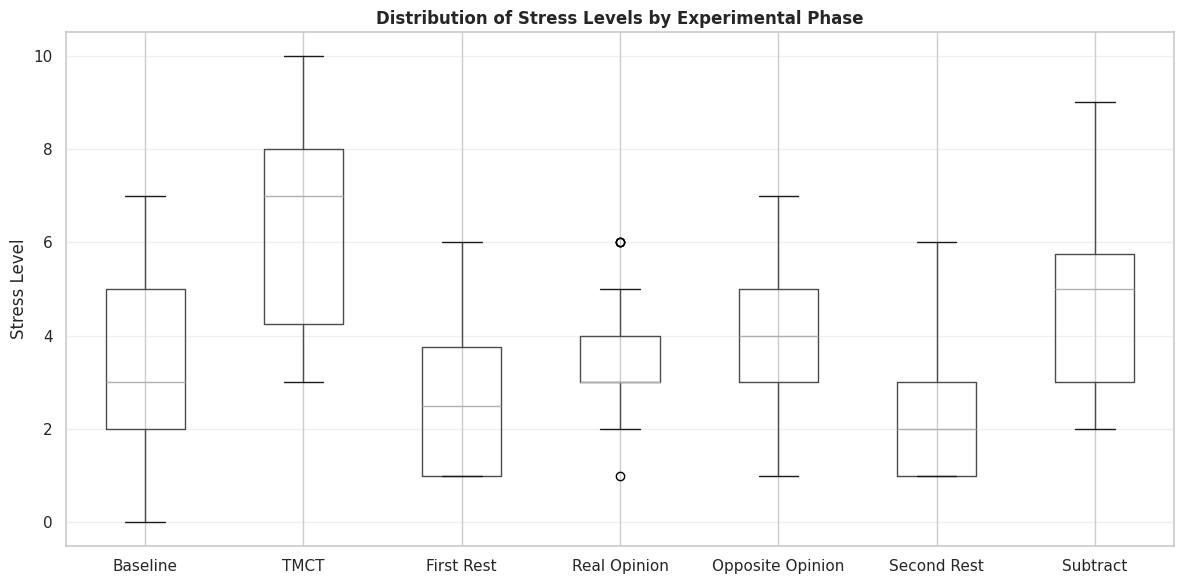

In [ ]:
# Stress_Level_v2 - Visualization

print("=" * 80)
print("VISUALIZATION: Stress_Level_v2")
print("=" * 80)

# Prepare data for plotting: exclude the non-numeric 'Unnamed: 0' column
df_stress_v2_numeric_cols = df_stress_v2.drop(columns=['Unnamed: 0'])
df_stress_v2_indexed = df_stress_v2.set_index('Unnamed: 0')

# Plot 1: Average stress by phase
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
mean_stress = df_stress_v2_numeric_cols.mean() # Calculate mean on numeric columns only
colors = sns.color_palette("coolwarm", len(mean_stress))
bars = plt.bar(range(len(mean_stress)), mean_stress.values, color=colors, edgecolor='black', linewidth=2)
plt.xticks(range(len(mean_stress)), mean_stress.index, rotation=45, ha='right')
plt.title('Average Stress Level by Experimental Phase', fontsize=12, fontweight='bold')
plt.ylabel('Stress Level (0-10 scale)')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_stress_v2_indexed, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Stress Level'}, linewidths=0.5) # Use indexed DF for heatmap
plt.title('Stress Levels: Subjects × Experimental Phases', fontsize=12, fontweight='bold')
plt.ylabel('Subject ID')

plt.tight_layout()
plt.show()

print("=" * 80)

# Plot 3: Line plot
plt.figure(figsize=(14, 8))

for subject_id in df_stress_v2_indexed.index: # Iterate through indexed DataFrame
    plt.plot(df_stress_v2_indexed.columns, df_stress_v2_indexed.loc[subject_id], marker='s', label=subject_id, alpha=0.7)

plt.title('Stress Level Progression Through Experimental Phases (All Subjects)', fontsize=12, fontweight='bold')
plt.xlabel('Experimental Phase')
plt.ylabel('Stress Level')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 80)

# Plot 4: Boxplot
plt.figure(figsize=(12, 6))
df_stress_v2_numeric_cols.boxplot() # Use numeric-only DF for boxplot
plt.title('Distribution of Stress Levels by Experimental Phase', fontsize=12, fontweight='bold')
plt.ylabel('Stress Level')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("=" * 80)